In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df =pd.read_csv('us_counties_covid19_daily.csv')

In [4]:
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [5]:
df.tail()

,date,county,state,fips,cases,deaths
800432,2020-12-05,Sweetwater,Wyoming,56037.0,2098,10.0
800433,2020-12-05,Teton,Wyoming,56039.0,1739,2.0
800434,2020-12-05,Uinta,Wyoming,56041.0,1187,5.0
800435,2020-12-05,Washakie,Wyoming,56043.0,519,8.0
800436,2020-12-05,Weston,Wyoming,56045.0,419,2.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800437 entries, 0 to 800436
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    800437 non-null  object 
 1   county  800437 non-null  object 
 2   state   800437 non-null  object 
 3   fips    792846 non-null  float64
 4   cases   800437 non-null  int64  
 5   deaths  783704 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 36.6+ MB


In [10]:
df.isnull().sum() /len(df)*100

date      0.0
county    0.0
state     0.0
fips      0.0
cases     0.0
deaths    0.0
dtype: float64

In [8]:
df.fips.fillna(value=df['fips'].mean(), inplace =True)

In [9]:
df.deaths.fillna(value=df['deaths'].mean(), inplace =True)

<Axes: ylabel='deaths'>

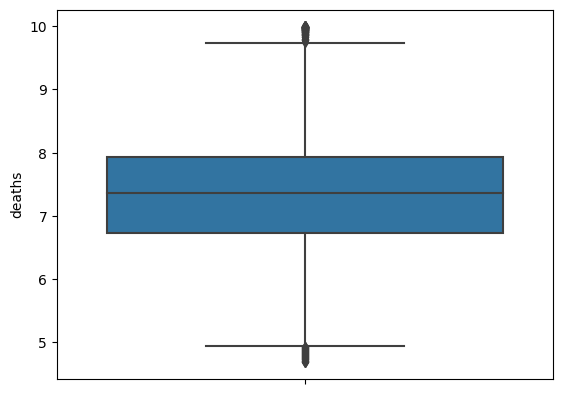

In [22]:
sns.boxplot(data = df, y= 'deaths')

In [12]:
df.duplicated('deaths').sum()

797268

In [13]:
df.drop_duplicates('deaths', inplace =True)

In [14]:
df.drop_duplicates('deaths', inplace =True)

In [15]:
df['deaths'] = np.log(df['deaths'])

c:\Users\khawar\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [17]:
df['cases'] = np.log(df['cases'])

c:\Users\khawar\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: ylabel='cases'>

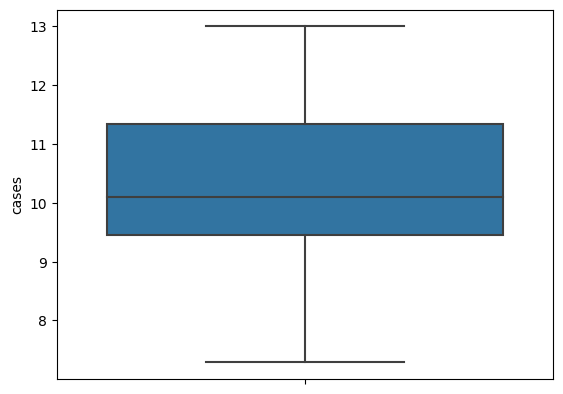

In [21]:
sns.boxplot(data = df, y= 'cases')

<Axes: xlabel='deaths', ylabel='Count'>

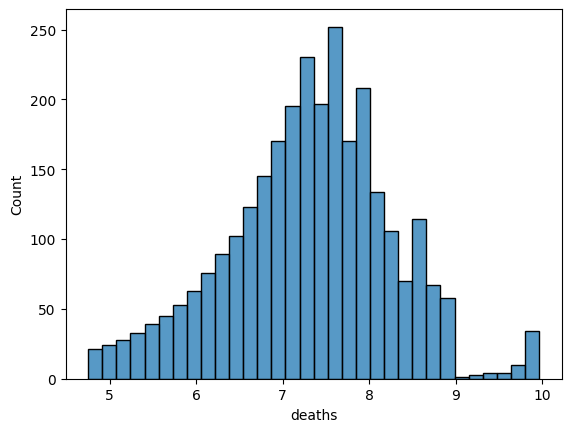

In [47]:
sns.histplot(data = df, x= 'deaths')

<Axes: xlabel='fips', ylabel='Count'>

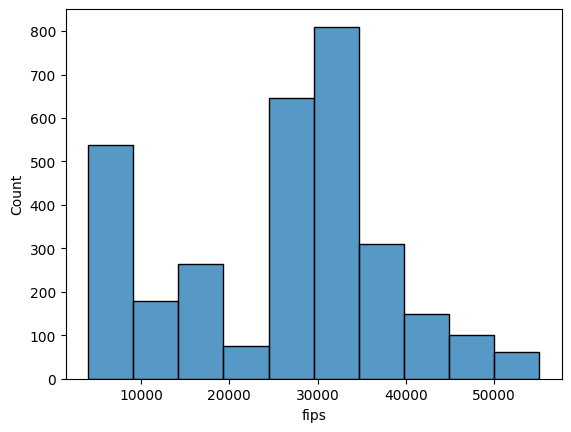

In [44]:
sns.histplot(data =df, x='fips' , bins = 10)

In [19]:
Q1 = df['deaths'].quantile(0.25)
Q3 = df['deaths'].quantile(0.75)
IQR = Q3 - Q1
IQR

lower_bound = Q1 -1.5 *IQR
upper_bound = Q3 + 1.5 * IQR

df=df[(df['deaths'] > lower_bound) & (df['deaths']< upper_bound)]

In [20]:
Q1 = df['cases'].quantile(0.25)
Q3 = df['cases'].quantile(0.75)
IQR = Q3 - Q1
IQR

lower_bound = Q1 -1.5 *IQR
upper_bound = Q3 + 1.5 * IQR

df=df[(df['cases'] > lower_bound) & (df['cases']< upper_bound)]

In [23]:
df.shape

(2900, 6)

In [24]:
X = df[['deaths','cases']]
y = df['fips']

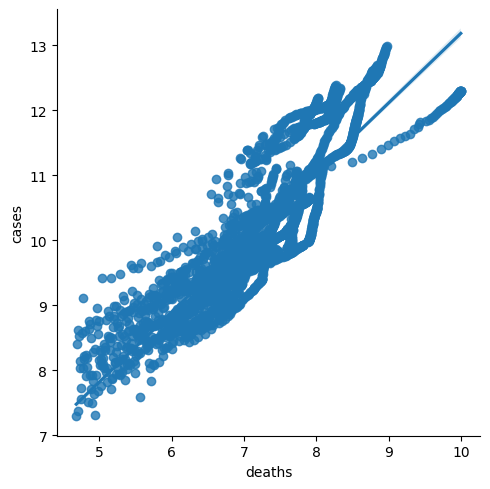

In [36]:
sns.lmplot(data =df, x='deaths', y='cases')

In [28]:
X.isnull().sum()

deaths    0
cases     0
dtype: int64

In [29]:
y.isnull().sum()

0

In [118]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# le.fit(df['date'])

# df['date'] = le.transform(df['date'])

In [119]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# le.fit(df['county'])

# df['county'] = le.transform(df['county'])

In [25]:
df.describe()

,fips,cases,deaths
count,2900.000000,2900.000000,2900.000000
mean,25372.666856,10.308713,7.319533
std,12444.351325,1.200253,0.987274
min,4013.000000,7.289611,4.682131
25%,17031.000000,9.459229,6.733104
50%,26125.000000,10.095945,7.362962
75%,34029.000000,11.330234,7.935766
max,53033.000000,12.993479,9.996112


In [30]:
df.tail()

,date,county,state,fips,cases,deaths
798425,2020-12-05,Middlesex,Massachusetts,25017.0,10.845641,7.805882
798514,2020-12-05,Wayne,Michigan,26163.0,11.159915,8.105609
798982,2020-12-05,Bergen,New Jersey,34003.0,10.534813,7.680176
799063,2020-12-05,Nassau,New York,36059.0,11.072232,7.727094
799912,2020-12-05,Harris,Texas,48201.0,12.189221,8.026170


In [34]:
y.shape

(2900,)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [38]:
# now call your model
model = LinearRegression()
# train your model
model.fit(X,y)
# prediction
model.predict([[8, 12]])

c:\Users\khawar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17595.86393213])

In [39]:
x_train, x_test , y_train , y_test = train_test_split(X,y, train_size=0.8)

In [42]:
x_train.shape

(2320, 2)

In [41]:
x_test.shape

(580, 2)

<Axes: xlabel='fips'>

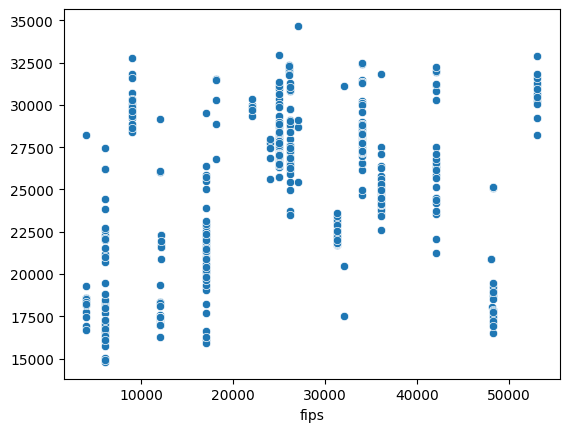

In [52]:
X_train, X_test , y_train , y_test = train_test_split(X,y, train_size=0.8)

# model 
model = LinearRegression()
model.fit(X_train, y_train)

# prediction 
predictions = model.predict(X_test)

sns.scatterplot(x =y_test, y =predictions)

In [53]:
model.score(X_test, y_test)  # not accurate best is 1.

0.13373312683492422

In [58]:
from sklearn.metrics import  mean_squared_error , mean_absolute_error, r2_score

mae = mean_absolute_error(y_true = y_test, y_pred = predictions)
mse = mean_squared_error(y_true = y_test, y_pred = predictions)
rmse = mean_squared_error(y_true = y_test, y_pred = predictions , squared =False)
R2 = r2_score(y_true = y_test, y_pred = predictions)

# print
print ("mae :", mae)
print ("mse :", mse)
print ("rmse :", rmse)
print ("R_squared :", R2)

mae : 10743.532419701964
mse : 171561546.65327638
rmse : 13098.15050506278
R_squared : -0.1601964922246064
